In [1]:
import os

import numpy as np

data_path = "/home/janczarknurek/higgs/HiggsCP/examples/th-www.if.uj.edu.pl/erichter/forHiggsCP/HiggsCP_data/rhorho/"

def load_file(filename):
    return np.load(os.path.join(data_path, filename))

weights = load_file("weigths.npy")
raw_w = load_file("rhorho_raw.w.npy")

In [2]:
# I am not sure why, but raw_w is transposed.

raw_w = np.transpose(raw_w)

In [3]:
# raw_w have different resolution than weights
# Axes have to be explicitely stated
import matplotlib.pyplot as plt


def display_normalized(row, *args, **kwargs):
    to_plot = zip(*[(x * 2 * np.pi / len(row), y) for x, y in enumerate(row)])
    plt.plot(to_plot[0], to_plot[1], *args, **kwargs)


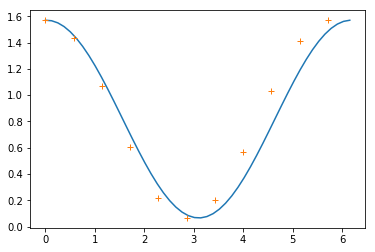

In [4]:
display_normalized(weights[0])
display_normalized(raw_w[0], '+')
plt.show()

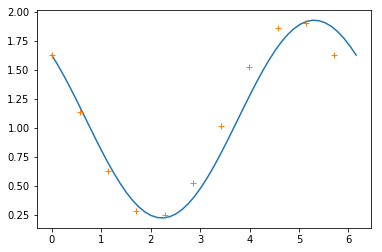

In [5]:
display_normalized(weights[1])
display_normalized(raw_w[1], '+')
plt.show()

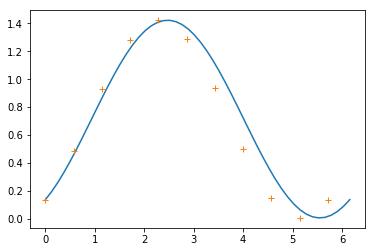

In [6]:
display_normalized(weights[100])
display_normalized(raw_w[100], '+')
plt.show()

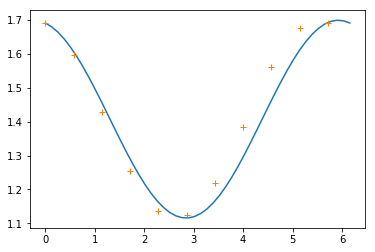

In [7]:
display_normalized(weights[500])
display_normalized(raw_w[500], '+')
plt.show()

In [9]:
def create_mixing_function(A, B, C):
    return lambda x: A + B * np.sin(x) + C * np.cos(x)

def create_function_graph(f, ran, resolution):
    args = np.linspace(ran[0], ran[1], resolution)
    return args, [f(x) for x in args]

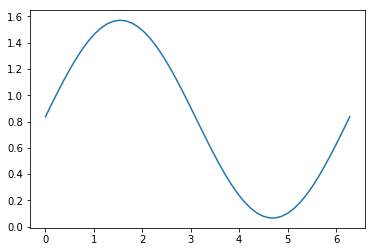

In [12]:
popts = load_file("popts.npy")

functions = [create_mixing_function(*popt) for popt in popts]

args, values = create_function_graph(functions[0], (0, 2 * np.pi), 50)
plt.plot(args, values)
plt.show()

In [26]:
def show_popts(func):
    args, values = create_function_graph(func, (0, 2 * np.pi), 50)
    plt.plot(args, values, c='r')

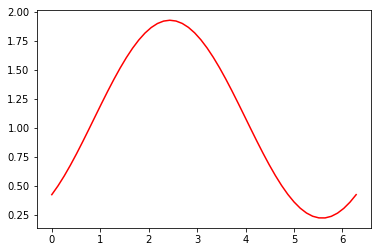

In [27]:
show_popts(functions[1])
plt.show()

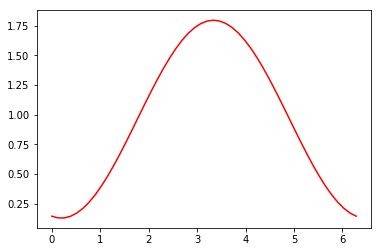

In [28]:
show_popts(functions[2])
plt.show()

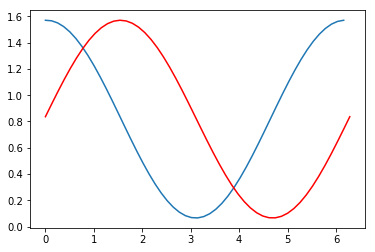

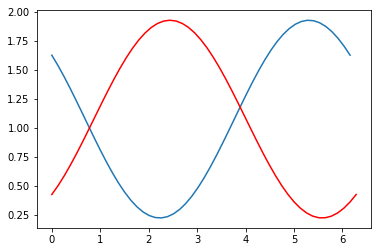

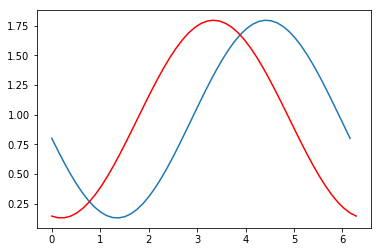

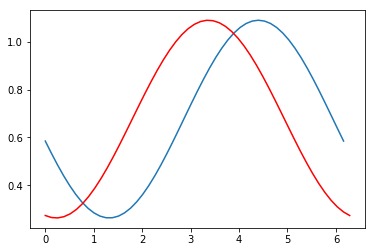

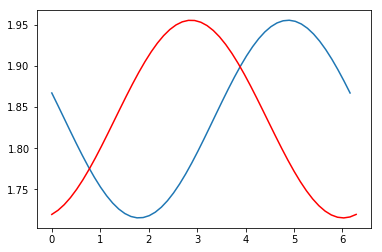

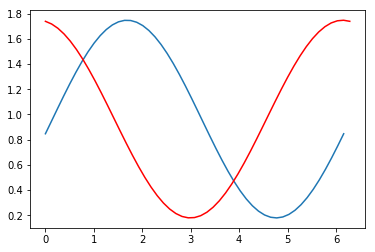

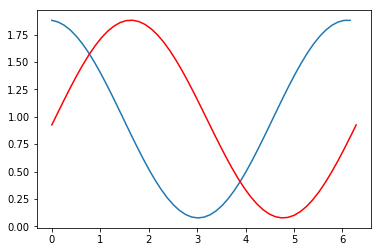

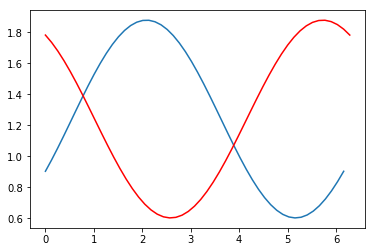

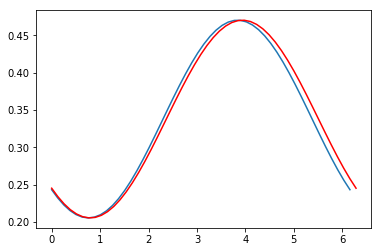

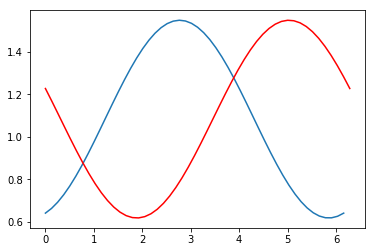

In [29]:
for i in range(10):
    display_normalized(weights[i])
    show_popts(functions[i])
    plt.show()